In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tpot import TPOTClassifier

In [2]:
pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 92.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=a72ff4144596cc0958dd4d56b57947478311bde723b5f2ce89f1167b3d477ce7
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [19]:
data=pd.read_csv("TrafficTwoMonth.csv")
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [22]:
# Check the column names to ensure correctness
data.columns


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [24]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [25]:
# Encode categorical variables
label_encoder=LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])


In [26]:
# Display basic statistics
data_description = data.describe()
data_description

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,3.193548,65.440692,12.161458,12.912970,18.646337,109.161458,2.162130
std,8.945023,2.006921,44.749335,11.537944,12.497736,10.973139,55.996312,1.186134
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,8.000000,1.000000,18.750000,3.000000,2.000000,10.000000,54.000000,1.000000
50%,16.000000,3.000000,62.000000,9.000000,10.000000,18.000000,104.000000,3.000000
75%,24.000000,5.000000,103.000000,19.000000,20.000000,27.000000,153.000000,3.000000
max,31.000000,6.000000,180.000000,70.000000,50.000000,60.000000,279.000000,3.000000


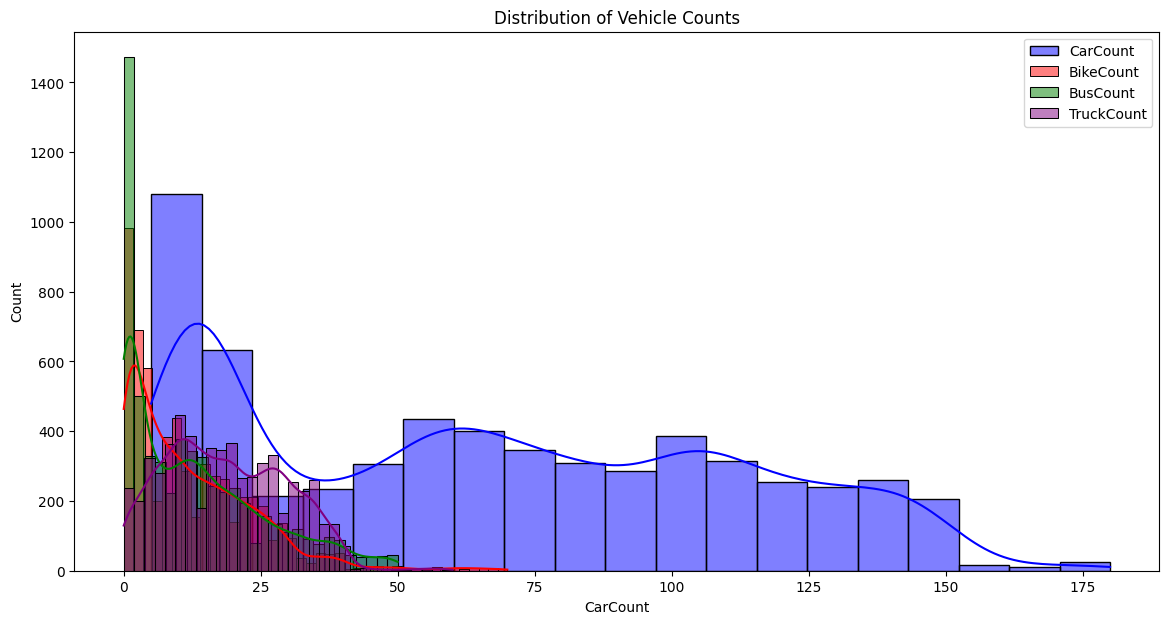

In [27]:
# Data Distribution Plots
plt.figure(figsize=(14, 7))
sns.histplot(data['CarCount'], kde=True, label='CarCount', color='blue')
sns.histplot(data['BikeCount'], kde=True, label='BikeCount', color='red')
sns.histplot(data['BusCount'], kde=True, label='BusCount', color='green')
sns.histplot(data['TruckCount'], kde=True, label='TruckCount', color='purple')
plt.legend()
plt.title('Distribution of Vehicle Counts')
plt.show()

In [28]:
data_corr=data[['Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation']]
data_corr

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,5,13,2,2,24,41,3
1,5,14,1,1,36,52,3
2,5,10,2,2,32,46,3
3,5,10,2,2,36,50,3
4,5,11,2,1,34,48,3
...,...,...,...,...,...,...,...
5947,4,16,3,1,36,56,3
5948,4,11,0,1,30,42,3
5949,4,15,4,1,25,45,3
5950,4,16,5,0,27,48,3


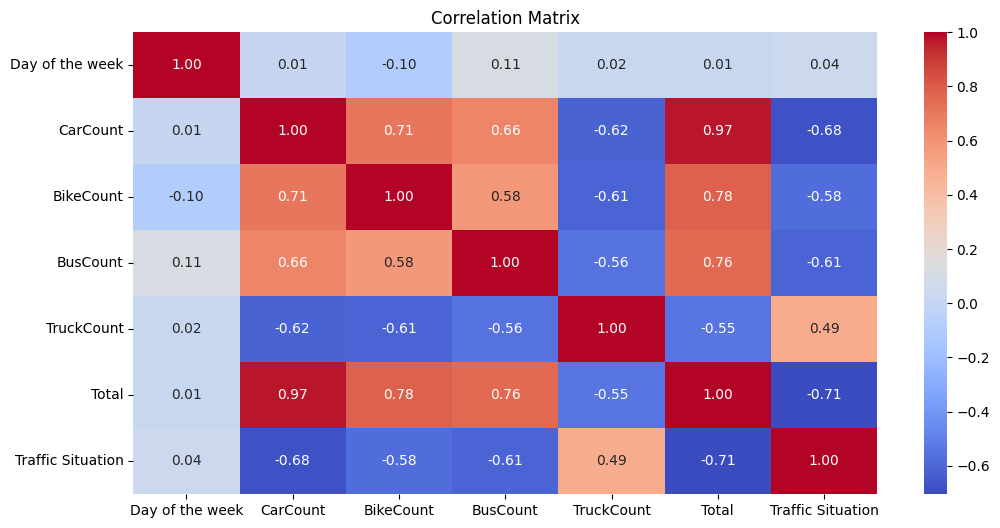

In [29]:

# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

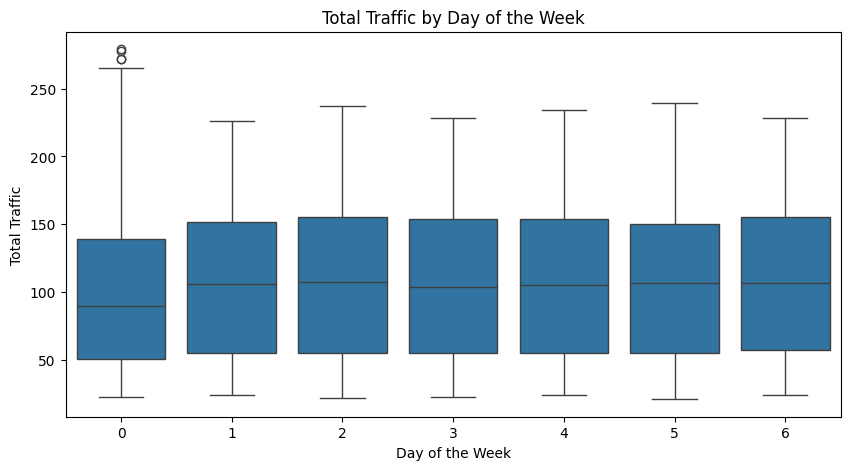

In [30]:
# Day of the Week Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Day of the week', y='Total', data=data)
plt.title('Total Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic')
plt.show()


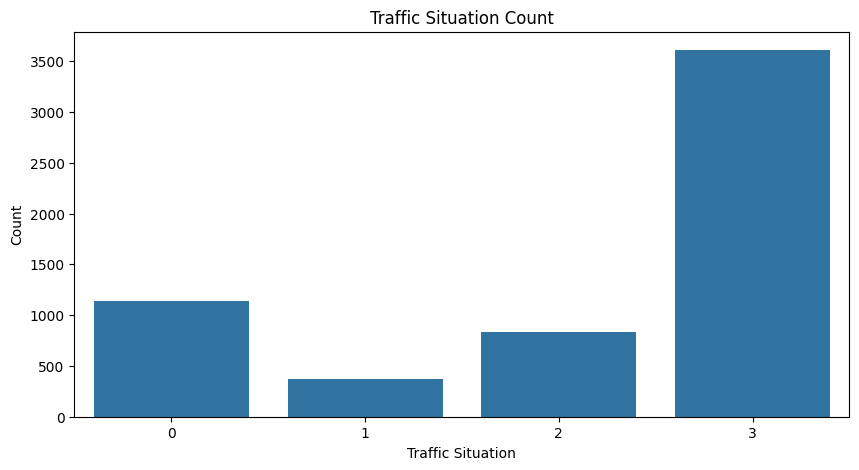

In [31]:
# Traffic Situation Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Traffic Situation', data=data)
plt.title('Traffic Situation Count')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('TrafficTwoMonth.csv')


In [2]:
data.drop(["Date","Total"],axis=1,inplace=True)

In [3]:

# Convert Date and Time to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.time

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

# Display basic statistics
data.describe()

# Display first few rows
data.head()


,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation
0,00:00:00,5,13,2,2,24,3
1,00:15:00,5,14,1,1,36,3
2,00:30:00,5,10,2,2,32,3
3,00:45:00,5,10,2,2,36,3
4,01:00:00,5,11,2,1,34,3


In [4]:
# Convert Time to seconds since midnight
data['Time'] = data['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [5]:
import numpy as np

In [6]:
# Drop any remaining non-numeric columns if any
data = data.select_dtypes(include=[np.number])


In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler
import pandas as pd

# Define features and target variable
X = data.drop(['Traffic Situation'], axis=1)
y = data['Traffic Situation']
feature_names = X.columns.tolist()
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize the resampled features
scaler = StandardScaler()  # or MinMaxScaler()
X_resampled_normalized = scaler.fit_transform(X_resampled)

# Split the balanced and normalized dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_normalized, y_resampled, test_size=0.2, random_state=42)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
print("Normalized resampled dataset shape:", X_resampled_normalized.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Original dataset shape: (5952, 6) (5952,)
Resampled dataset shape: (14440, 6) (14440,)
Normalized resampled dataset shape: (14440, 6)
Training set shape: (11552, 6) (11552,)
Testing set shape: (2888, 6) (2888,)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9736843741863215

Generation 2 - Current best internal CV score: 0.9757615844418096

Generation 3 - Current best internal CV score: 0.9757615844418096

Generation 4 - Current best internal CV score: 0.9757615844418096

Generation 5 - Current best internal CV score: 0.9758480895997123

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=14, min_samples_split=19), criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=4)
TPOT Optimized Decision Tree Accuracy: 0.9768005540166205
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       735
           1       0.98      0.99      0.98       741
           2       0.98      1.00      0.99       715
           3       0.97      0.95      0.96       697

    accuracy                           0.98      2888
   macro avg     

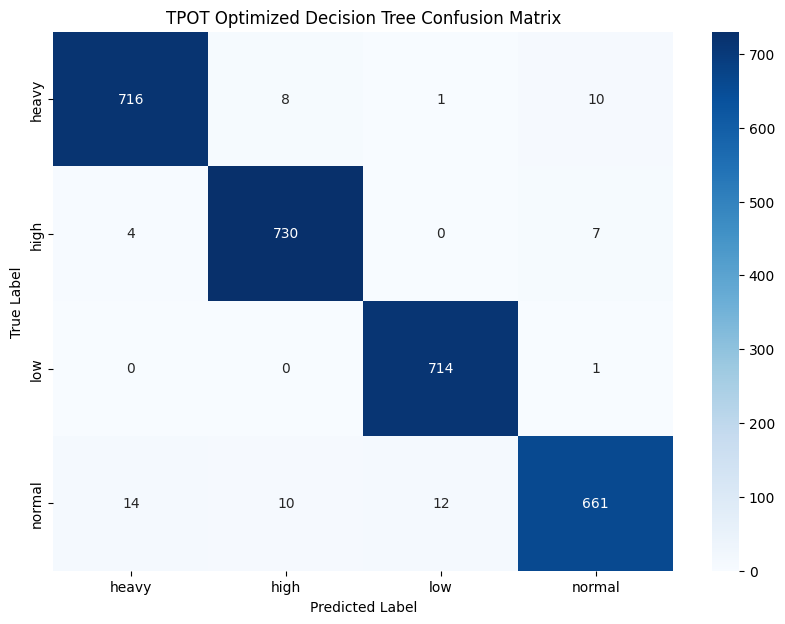

['tpot_optimized_decision_tree_model.pkl']

In [12]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define the TPOT classifier focusing only on DecisionTreeClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict={
        'sklearn.tree.DecisionTreeClassifier': {
            'criterion': ['gini', 'entropy'],
            'max_depth': range(1, 20),
            'min_samples_split': range(2, 20),
            'min_samples_leaf': range(1, 20),
            'max_features': ['auto', 'sqrt', 'log2', None]
        }
    }
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline discovered by TPOT
tpot.export('tpot_best_decision_tree_pipeline.py')

# Evaluate the TPOT model
y_pred_tpot_dt = tpot.predict(X_test)
print("TPOT Optimized Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tpot_dt))
print(classification_report(y_test, y_pred_tpot_dt))

# Compute confusion matrix for TPOT optimized Decision Tree
conf_matrix_tpot_dt = confusion_matrix(y_test, y_pred_tpot_dt)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tpot_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('TPOT Optimized Decision Tree Confusion Matrix')
plt.savefig('tpot_decision_tree_confusion_matrix.png')
plt.show()

# Save the TPOT optimized Decision Tree model
tpot_dt_model = tpot.fitted_pipeline_
joblib.dump(tpot_dt_model, 'tpot_optimized_decision_tree_model.pkl')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.986928542393709

Generation 2 - Current best internal CV score: 0.986928542393709

Generation 3 - Current best internal CV score: 0.986928542393709

Generation 4 - Current best internal CV score: 0.986928542393709

Generation 5 - Current best internal CV score: 0.9871013653878216

Best pipeline: XGBClassifier(input_matrix, colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=181, subsample=0.7)
TPOT Optimized XGBoost Accuracy: 0.9854570637119113
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       735
           1       0.99      0.99      0.99       741
           2       1.00      0.99      0.99       715
           3       0.98      0.97      0.97       697

    accuracy                           0.99      2888
   macro avg       0.99      0.99      0.99      2888
weighted avg       0.99      0.99      0.99      2888



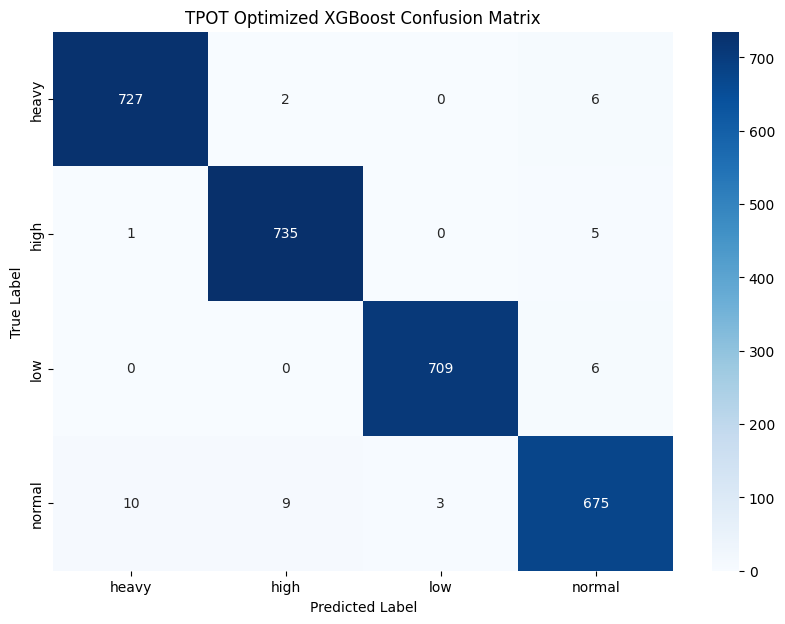

['tpot_optimized_xgboost_model.pkl']

In [13]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define the TPOT classifier focusing only on XGBClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict={
        'xgboost.XGBClassifier': {
            'n_estimators': range(50, 200),
            'max_depth': range(3, 10),
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2, 0.3],
            'min_child_weight': range(1, 6)
        }
    }
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline discovered by TPOT
tpot.export('tpot_best_xgboost_pipeline.py')

# Evaluate the TPOT model
y_pred_tpot_xgb = tpot.predict(X_test)
print("TPOT Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_tpot_xgb))
print(classification_report(y_test, y_pred_tpot_xgb))

# Compute confusion matrix for TPOT optimized XGBoost
conf_matrix_tpot_xgb = confusion_matrix(y_test, y_pred_tpot_xgb)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tpot_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('TPOT Optimized XGBoost Confusion Matrix')
plt.savefig('tpot_xgboost_confusion_matrix.png')
plt.show()

# Save the TPOT optimized XGBoost model
tpot_xgb_model = tpot.fitted_pipeline_
joblib.dump(tpot_xgb_model, 'tpot_optimized_xgboost_model.pkl')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9831195805492647

Generation 2 - Current best internal CV score: 0.9831195805492647

Generation 3 - Current best internal CV score: 0.9840717367156138

Generation 4 - Current best internal CV score: 0.9844180570619342

Generation 5 - Current best internal CV score: 0.9844180570619342

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=177)
TPOT Optimized Random Forest Accuracy: 0.9830332409972299
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       735
           1       0.99      0.99      0.99       741
           2       0.99      0.99      0.99       715
           3       0.98      0.96      0.97       697

    accuracy                           0.98      2888
   macro avg       0.98      0.98      0.98      2888
weighted avg       0.98      0.98      0.98      2888



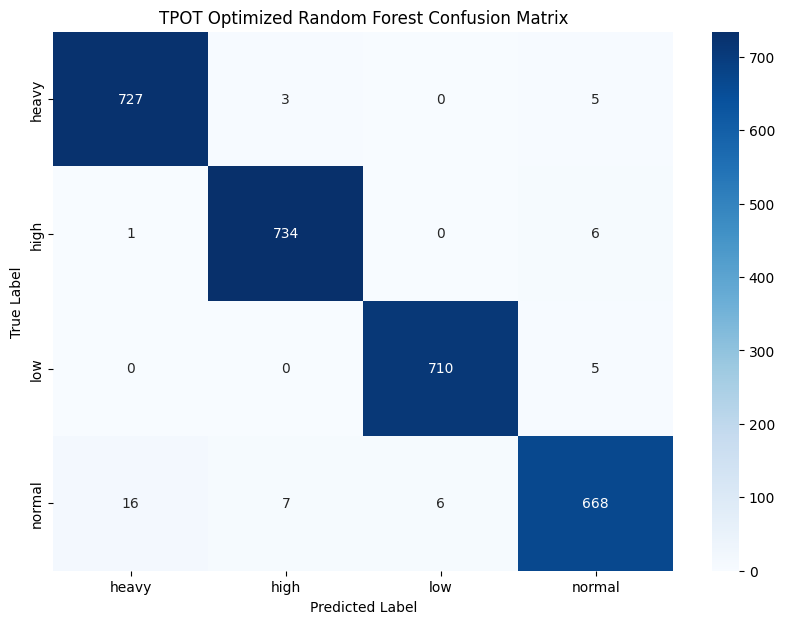

['tpot_optimized_random_forest_model.pkl']

In [14]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define the TPOT classifier focusing only on RandomForestClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict={
        'sklearn.ensemble.RandomForestClassifier': {
            'n_estimators': range(50, 200),
            'max_depth': range(3, 20),
            'min_samples_split': range(2, 20),
            'min_samples_leaf': range(1, 20),
            'max_features': ['auto', 'sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    }
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline discovered by TPOT
tpot.export('tpot_best_random_forest_pipeline.py')

# Evaluate the TPOT model
y_pred_tpot_rf = tpot.predict(X_test)
print("TPOT Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_tpot_rf))
print(classification_report(y_test, y_pred_tpot_rf))

# Compute confusion matrix for TPOT optimized Random Forest
conf_matrix_tpot_rf = confusion_matrix(y_test, y_pred_tpot_rf)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tpot_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('TPOT Optimized Random Forest Confusion Matrix')
plt.savefig('tpot_random_forest_confusion_matrix.png')
plt.show()

# Save the TPOT optimized Random Forest model
tpot_rf_model = tpot.fitted_pipeline_
joblib.dump(tpot_rf_model, 'tpot_optimized_random_forest_model.pkl')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9816481686494667

Generation 2 - Current best internal CV score: 0.9816481686494667

Generation 3 - Current best internal CV score: 0.9816481686494667

Generation 4 - Current best internal CV score: 0.9816481686494667

Generation 5 - Current best internal CV score: 0.9818211040365952

Best pipeline: BaggingClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=True, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=75)
TPOT Optimized Bagging Accuracy: 0.9795706371191135
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       735
           1       0.98      0.99      0.99       741
           2       0.98      1.00      0.99       715
           3       0.98      0.94      0.96       697

    accuracy                           0.98      2888
   macro avg       0.98      0.98      0.98      2888
weighted avg       0.98      0.98      0.98      2888



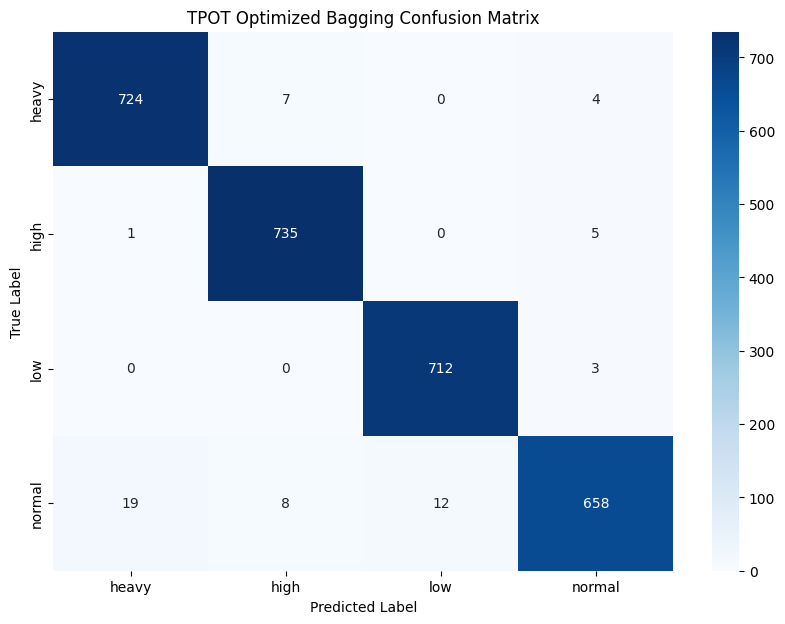

['tpot_optimized_bagging_model.pkl']

In [15]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define the TPOT classifier focusing only on BaggingClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict={
        'sklearn.ensemble.BaggingClassifier': {
            'n_estimators': range(10, 100),
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]
        }
    }
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline discovered by TPOT
tpot.export('tpot_best_bagging_pipeline.py')

# Evaluate the TPOT model
y_pred_tpot_bag = tpot.predict(X_test)
print("TPOT Optimized Bagging Accuracy:", accuracy_score(y_test, y_pred_tpot_bag))
print(classification_report(y_test, y_pred_tpot_bag))

# Compute confusion matrix for TPOT optimized Bagging
conf_matrix_tpot_bag = confusion_matrix(y_test, y_pred_tpot_bag)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tpot_bag, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('TPOT Optimized Bagging Confusion Matrix')
plt.savefig('tpot_bagging_confusion_matrix.png')
plt.show()

# Save the TPOT optimized Bagging model
tpot_bag_model = tpot.fitted_pipeline_
joblib.dump(tpot_bag_model, 'tpot_optimized_bagging_model.pkl')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9202727403852456

Generation 2 - Current best internal CV score: 0.9202727403852456

Generation 3 - Current best internal CV score: 0.9202727403852456

Generation 4 - Current best internal CV score: 0.9202727403852456

Generation 5 - Current best internal CV score: 0.9230435279418405

Best pipeline: AdaBoostClassifier(AdaBoostClassifier(input_matrix, algorithm=SAMME, learning_rate=0.5, n_estimators=145), algorithm=SAMME, learning_rate=0.1, n_estimators=75)
TPOT Optimized AdaBoost Accuracy: 0.913781163434903
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       735
           1       0.88      0.92      0.90       741
           2       0.96      0.94      0.95       715
           3       0.91      0.85      0.88       697

    accuracy                           0.91      2888
   macro avg       0.91      0.91      0.91      2888
weighted avg       0.91      0.91      0.91      2888



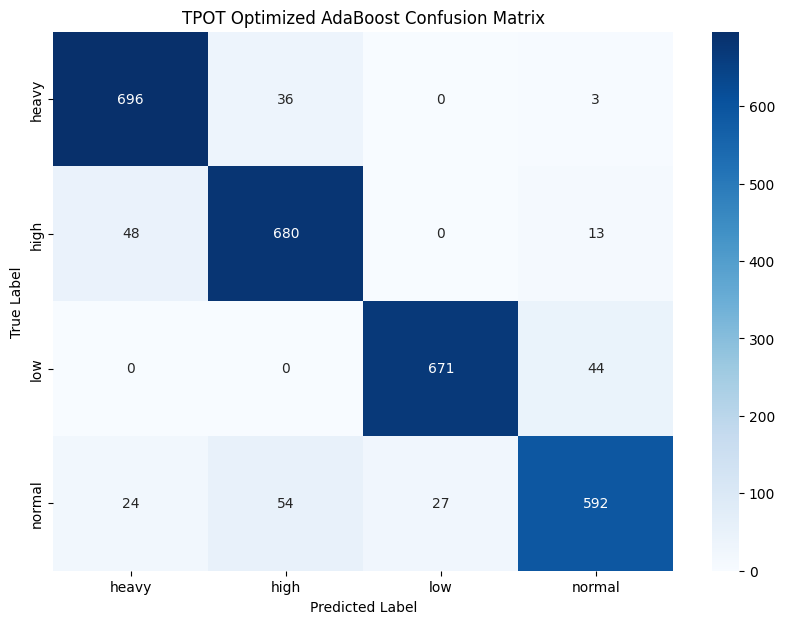

['tpot_optimized_adaboost_model.pkl']

In [16]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define the TPOT classifier focusing only on AdaBoostClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    config_dict={
        'sklearn.ensemble.AdaBoostClassifier': {
            'n_estimators': range(50, 200),
            'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    }
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best pipeline discovered by TPOT
tpot.export('tpot_best_adaboost_pipeline.py')

# Evaluate the TPOT model
y_pred_tpot_ada = tpot.predict(X_test)
print("TPOT Optimized AdaBoost Accuracy:", accuracy_score(y_test, y_pred_tpot_ada))
print(classification_report(y_test, y_pred_tpot_ada))

# Compute confusion matrix for TPOT optimized AdaBoost
conf_matrix_tpot_ada = confusion_matrix(y_test, y_pred_tpot_ada)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tpot_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('TPOT Optimized AdaBoost Confusion Matrix')
plt.savefig('tpot_adaboost_confusion_matrix.png')
plt.show()

# Save the TPOT optimized AdaBoost model
tpot_ada_model = tpot.fitted_pipeline_
joblib.dump(tpot_ada_model, 'tpot_optimized_adaboost_model.pkl')


In [17]:
# prompt: download all the files

from google.colab import files
files.download('tpot_best_decision_tree_pipeline.py')
files.download('tpot_decision_tree_confusion_matrix.png')
files.download('tpot_optimized_decision_tree_model.pkl')
files.download('tpot_best_xgboost_pipeline.py')
files.download('tpot_xgboost_confusion_matrix.png')
files.download('tpot_optimized_xgboost_model.pkl')
files.download('tpot_best_random_forest_pipeline.py')
files.download('tpot_random_forest_confusion_matrix.png')
files.download('tpot_optimized_random_forest_model.pkl')
files.download('tpot_best_bagging_pipeline.py')
files.download('tpot_bagging_confusion_matrix.png')
files.download('tpot_optimized_bagging_model.pkl')
files.download('tpot_best_adaboost_pipeline.py')
files.download('tpot_adaboost_confusion_matrix.png')
files.download('tpot_optimized_adaboost_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------- ------------------------------ 30.7/129.1 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 122.9/129.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.944612721602122

Best val_accuracy So Far: 0.9503822326660156
Total elapsed time: 00h 01m 34s
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.93      0.97      0.95       741
           2       0.97      0.98      0.98       715
           3       0.95      0.88      0.92       697

    accuracy                           0.96      2888
   macro avg       0.96      0.95      0.95      2888
weighted avg       0.96      0.96      0.96      2888

[[721   9   0   5]
 [  6 722   0  13]
 [  0   0 702  13]
 [ 12  48  22 615]]


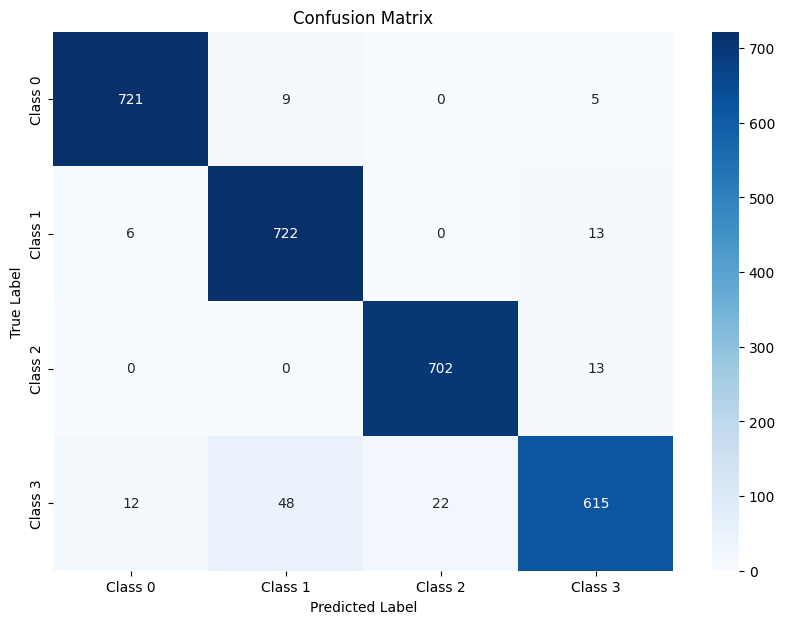

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(layers.Conv1D(
            filters=hp.Int('filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(X_train.shape[1], 1)
        ))
        model.add(layers.MaxPooling1D(pool_size=2))
        model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.3, max_value=0.5, step=0.1)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_fc', min_value=0.3, max_value=0.5, step=0.1)))
        model.add(layers.Dense(4, activation='softmax'))  # Change here for 4 classes
        
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                      loss='sparse_categorical_crossentropy',  # Change here for multiclass
                      metrics=['accuracy'])
        return model


# Instantiate the HyperModel
hypermodel = CNNHyperModel()

# Instantiate the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='cnn_traffic'
)

# Run the tuner search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the best model
best_model.save('cnn_traffic_best_model.h5')


Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.8636953830718994

Best val_accuracy So Far: 0.899466315905253
Total elapsed time: 00h 04m 08s


c:\Users\0871\.conda\envs\colab\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       735
           1       0.86      0.91      0.88       741
           2       0.94      0.99      0.97       715
           3       0.83      0.89      0.86       697

    accuracy                           0.90      2888
   macro avg       0.90      0.90      0.90      2888
weighted avg       0.91      0.90      0.90      2888

[[595  86   0  54]
 [  0 675   0  66]
 [  0   0 709   6]
 [  5  28  45 619]]


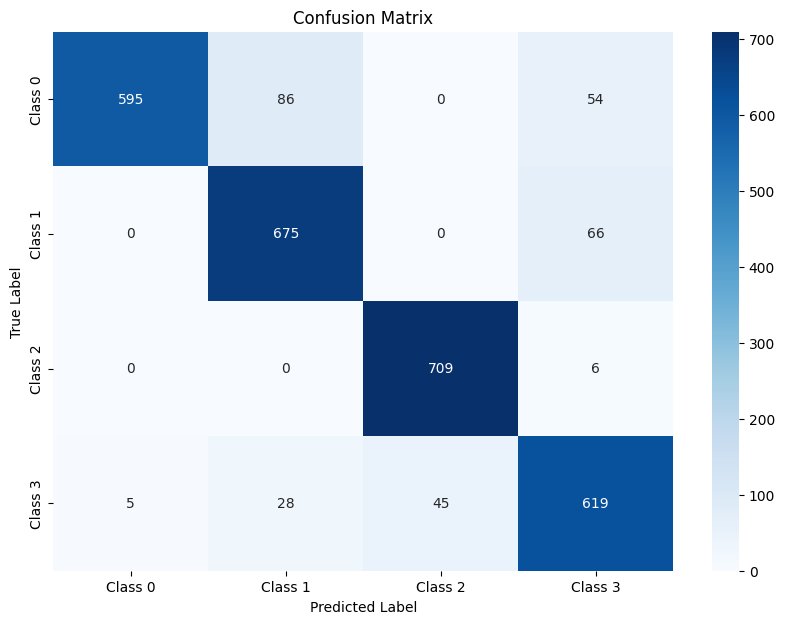

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1], 1)))  # Adjust input shape for LSTM
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            return_sequences=True,  # Return sequences for next LSTM layer
            dropout=hp.Float('dropout', min_value=0.3, max_value=0.5, step=0.1)
        ))
        model.add(layers.LSTM(
            units=hp.Int('units_2', min_value=32, max_value=128, step=32),
            dropout=hp.Float('dropout_2', min_value=0.3, max_value=0.5, step=0.1)
        ))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_fc', min_value=0.3, max_value=0.5, step=0.1)))
        model.add(layers.Dense(4, activation='softmax'))  # Change here for 4 classes
        
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                      loss='sparse_categorical_crossentropy',  # Change here for multiclass
                      metrics=['accuracy'])
        return model

# Instantiate the HyperModel
hypermodel = LSTMHyperModel()

# Instantiate the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='lstm_traffic'
)

# Run the tuner search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the best model
best_model.save('lstm_traffic_best_model.h5')
